In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loads the main TensorFlow package.
layers contains building blocks like Dense, Conv2D, Dropout, LSTM, etc., that you can stack to create models.

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

2025-08-14 18:12:09.009485: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-14 18:12:09.009642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-14 18:12:09.131374: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv('/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')

In [4]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
data.shape

(9879, 40)

In [6]:
data.drop('gameId', axis=1, inplace=True)

data.sample(frac=1) → takes 100% (frac=1) of the rows but in a random order (shuffling).

.reset_index(drop=True) → resets the index after shuffling so you don’t keep the old row numbers.

In [7]:
data = data.sample(frac=1).reset_index(drop=True)

That line is selecting the blueWins column from your shuffled DataFrame and storing it in y.

blueWins is the target label in this League of Legends dataset —
1 means the blue team won, 0 means they didn’t.

In [8]:
y = data['blueWins']
y

0       1
1       0
2       1
3       0
4       1
       ..
9874    1
9875    1
9876    0
9877    1
9878    0
Name: blueWins, Length: 9879, dtype: int64

That line is creating your features DataFrame X by removing the target column blueWins from data but without altering the original DataFrame.

In [9]:
X = data.drop('blueWins', axis=1, inplace=False)

In [10]:
X

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,15,6,1,6,3,5,1,1,0,0,...,0,15236,6.8,17312,230,52,-1402,-1512,23.0,1523.6
1,18,4,1,8,1,6,1,0,1,0,...,0,14119,6.6,17037,210,60,-4488,-3191,21.0,1411.9
2,16,5,0,6,4,7,0,0,0,0,...,0,15067,6.8,17470,213,52,-1552,-1488,21.3,1506.7
3,18,4,1,5,3,4,0,0,0,0,...,0,15909,7.2,18532,254,53,27,-114,25.4,1590.9
4,13,1,0,4,6,2,0,0,0,0,...,0,16829,6.8,18389,223,75,2142,1742,22.3,1682.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,19,4,1,8,6,8,1,1,0,0,...,0,16515,7.0,17869,233,47,-469,755,23.3,1651.5
9875,18,1,0,4,4,4,1,0,1,0,...,0,15179,6.6,16617,214,38,-202,-686,21.4,1517.9
9876,19,2,1,6,7,7,1,0,1,0,...,0,16563,6.8,18447,235,36,513,1056,23.5,1656.3
9877,16,2,1,6,3,5,1,1,0,0,...,0,14488,6.4,16519,201,61,-2443,-1566,20.1,1448.8


## Feature Correlation

Close to +1 → strong positive relationship (as the feature increases, wins are more likely).

Close to -1 → strong negative relationship (as the feature increases, wins are less likely).

Near 0 → little or no linear relationship.

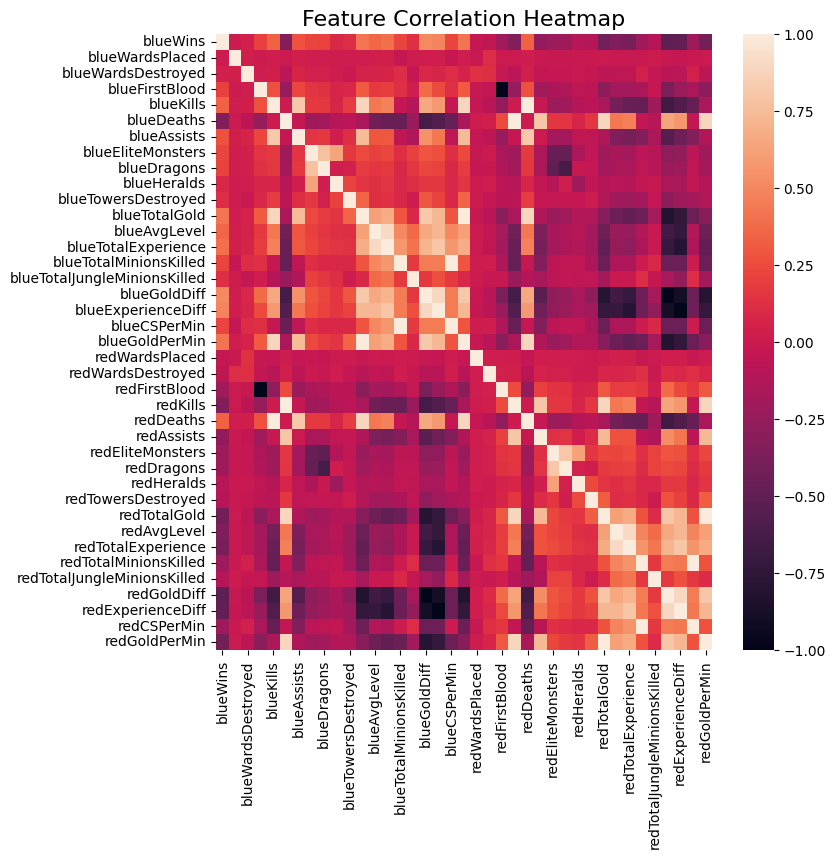

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr())
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

## Compute correlation matrix
## Get correlations with 'blueWins' and sort

In [12]:

corr_matrix = data.corr()


blue_corr = corr_matrix['blueWins'].sort_values(ascending=False)

print(blue_corr)


blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroyed             -0.103696
redTotalJungleMi

correlation heatmap for your features only (X), without the target column blueWins. This is useful to see relationships between features and detect multicollinearity.


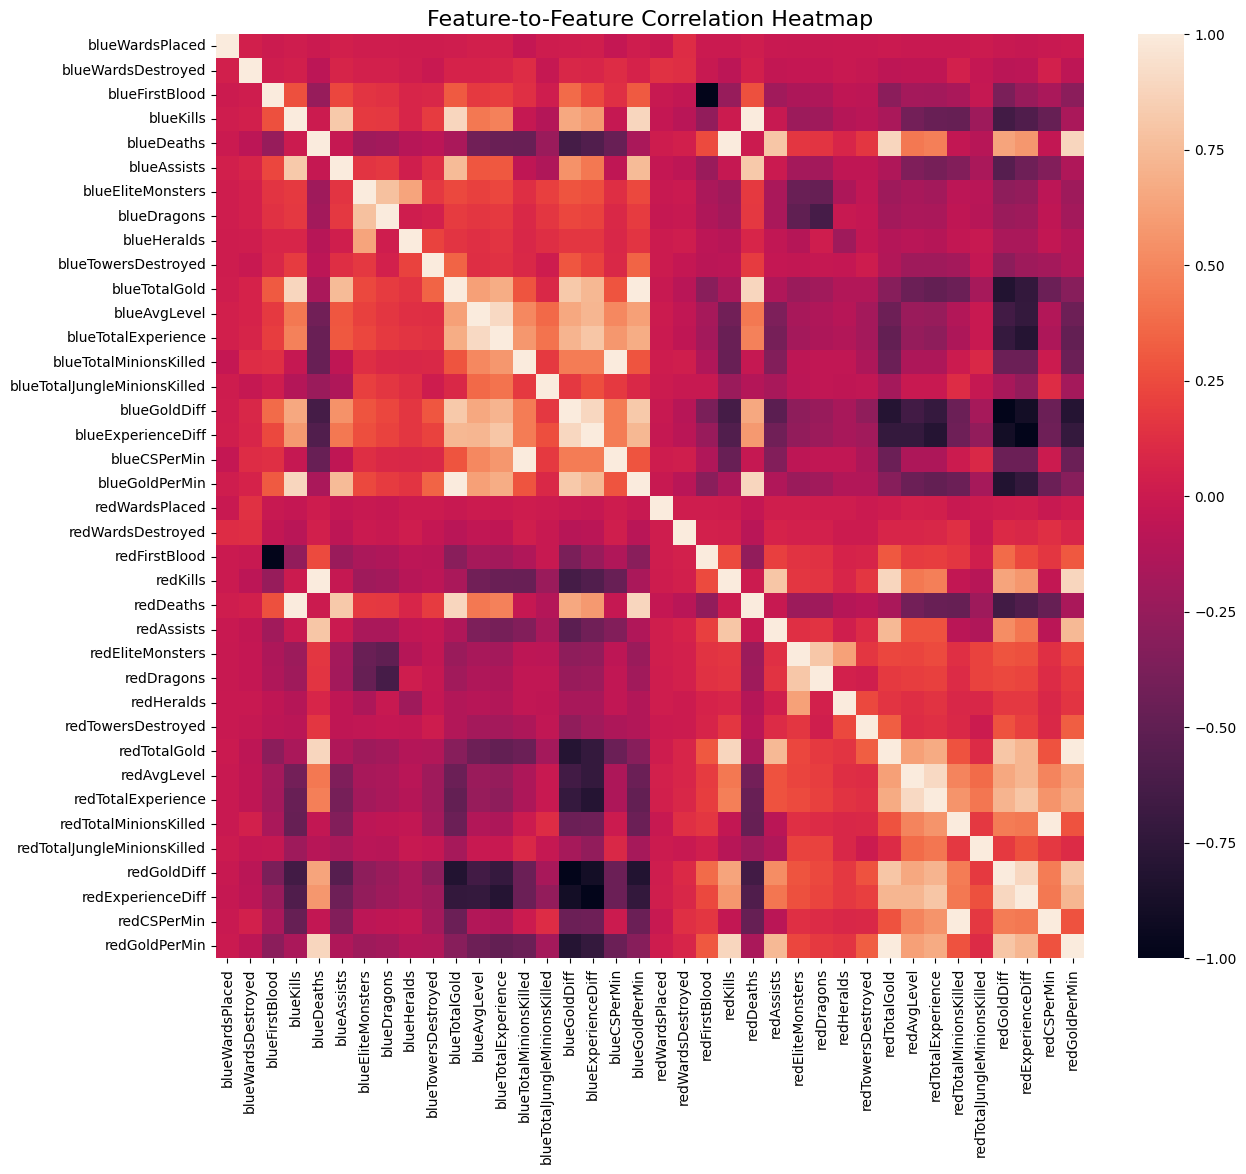

In [13]:
plt.figure(figsize=(14,12))
sns.heatmap(X.corr())
plt.title("Feature-to-Feature Correlation Heatmap", fontsize=16)
plt.show()

## Compute correlation matrix
### Select upper triangle of the correlation matrix
Find feature pairs with correlation > 0.8
abs() → we care about strength, not direction.

np.triu(..., k=1) → upper triangle of matrix to avoid duplicates and self-correlation.

upper.loc[row, col] > 0.8 → only pairs with strong correlation.

Sorting and printing shows which features are highly correlated and could be redundant.

In [14]:

corr_matrix = X.corr().abs()  # use absolute values for magnitude


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find feature pairs with correlation > 0.8
high_corr_pairs = [(col, row, upper.loc[row, col]) 
                   for col in upper.columns 
                   for row in upper.index 
                   if upper.loc[row, col] > 0.8]

# Sort by correlation descending
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)

# Print top correlated pairs
for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]}: correlation = {pair[2]:.2f}")


redGoldPerMin & redTotalGold: correlation = 1.00
blueCSPerMin & blueTotalMinionsKilled: correlation = 1.00
redCSPerMin & redTotalMinionsKilled: correlation = 1.00
blueGoldPerMin & blueTotalGold: correlation = 1.00
redKills & blueDeaths: correlation = 1.00
redDeaths & blueKills: correlation = 1.00
redGoldDiff & blueGoldDiff: correlation = 1.00
redExperienceDiff & blueExperienceDiff: correlation = 1.00
redFirstBlood & blueFirstBlood: correlation = 1.00
redTotalExperience & redAvgLevel: correlation = 0.90
blueTotalExperience & blueAvgLevel: correlation = 0.90
blueExperienceDiff & blueGoldDiff: correlation = 0.89
redGoldDiff & blueExperienceDiff: correlation = 0.89
redExperienceDiff & blueGoldDiff: correlation = 0.89
redExperienceDiff & redGoldDiff: correlation = 0.89
blueGoldPerMin & blueKills: correlation = 0.89
redDeaths & blueGoldPerMin: correlation = 0.89
blueTotalGold & blueKills: correlation = 0.89
redDeaths & blueTotalGold: correlation = 0.89
redTotalGold & blueDeaths: correlation 

What happens here:

num_examples → total dataset size.

num_train_examples → floor of 70% of total → ensures you don’t exceed the dataset size.

num_test_examples → ceil of remaining 30% → ensures all examples are used.

In [15]:
train_test_split = 0.7

num_examples = X.shape[0]
num_train_examples = int(np.floor(num_examples*train_test_split))
num_test_examples = int(np.ceil(num_examples - num_train_examples))

print(num_examples)
print(num_train_examples)
print(num_test_examples)

9879
6915
2964


### Adam optimizer instance with custom hyperparameters for TensorFlow model.
learning_rate=0.001 → typical default value for Adam. 

beta_1 & beta_2 → control moving averages of gradients; 

epsilon → prevents numerical instability.

amsgrad=False → standard Adam algorithm;

In [16]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,name='Adam')

## TensorFlow Keras functional API model
Input shape (38,) → matches the number of features in your dataset (X.shape[1]).

Hidden layers → two Dense layers with 16 neurons each, ReLU activation.

Output layer → 2 neurons with softmax, so the model outputs probabilities for 2 classes.

Note: Since blueWins is binary (0 or 1), you can also use a single neuron with sigmoid instead of 2 neurons with softmax. Both approaches work.

model.summary() → prints a table with each layer, output shape, and number of parameters.

In [17]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)

outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense (Dense)               (None, 16)                624       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 930 (3.63 KB)
Trainable params: 930 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Parameter calculations :

Dense layer params = (input_features × neurons) + bias

dense: (38 × 16) + 16 = 608 + 16 = 624 

dense_1: (16 × 16) + 16 = 256 + 16 = 272 

dense_2: (16 × 2) + 2 = 32 + 2 = 34 

Total params = 624 + 272 + 34 = 930

### custom Adam optimizer and specifying SparseCategoricalCrossentropy as the loss.

SparseCategoricalCrossentropy:

Use this when your target y consists of integer labels (0, 1, 2, …) instead of one-hot encoded vectors.

Matches your current y (0 or 1).

Softmax output:

You have 2 neurons in the last layer, so SparseCategoricalCrossentropy is appropriate.

In [18]:
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    
)

### proportion of games where the blue team won.
y.sum() → adds up all values in y (since blueWins is 0 or 1, this counts total blue wins).

num_examples → total number of rows in the dataset.

The division gives the win rate of the blue team as a fraction between 0 and 1.


In [19]:
y.sum()/num_examples

0.4990383642069035

### Training & Test sets.
iloc → selects rows and columns by integer position.

0:num_train_examples → slices the first portion of the dataset for training.

num_train_examples:num_examples → slices the remaining rows for testing.

In [20]:
X_train = X.iloc[0:num_train_examples, :]
y_train = y.iloc[0:num_train_examples]

X_test = X.iloc[num_train_examples:num_examples, :]
y_test = y.iloc[num_train_examples:num_examples]

In [21]:
print(X_train.shape)
X_train.head()

(6915, 38)


,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,15,6,1,6,3,5,1,1,0,0,...,0,15236,6.8,17312,230,52,-1402,-1512,23.0,1523.6
1,18,4,1,8,1,6,1,0,1,0,...,0,14119,6.6,17037,210,60,-4488,-3191,21.0,1411.9
2,16,5,0,6,4,7,0,0,0,0,...,0,15067,6.8,17470,213,52,-1552,-1488,21.3,1506.7
3,18,4,1,5,3,4,0,0,0,0,...,0,15909,7.2,18532,254,53,27,-114,25.4,1590.9
4,13,1,0,4,6,2,0,0,0,0,...,0,16829,6.8,18389,223,75,2142,1742,22.3,1682.9


batch size:

Number of samples processed before the model updates weights.

Epochs:

Number of times the entire training dataset will pass through the model.

In [22]:
batch_size= 32
epochs = 300

### TensorFlow functional API model

validation_split=0.2 → 20% of X_train will be used as a validation set for monitoring performance.

shuffle=True → data is shuffled each epoch for better generalization.

verbose='auto' → displays training progress automatically.

In [23]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose='auto',
    callbacks=None,
    validation_split=0.2,
    
    shuffle=True,
    
)

Epoch 1/300
173/173 [==============================] - 1s 2ms/step - loss: 151.1718 - accuracy: 0.6448 - val_loss: 17.0762 - val_accuracy: 0.6283
Epoch 2/300
173/173 [==============================] - 0s 2ms/step - loss: 14.0878 - accuracy: 0.6365 - val_loss: 18.3047 - val_accuracy: 0.6847
Epoch 3/300
173/173 [==============================] - 0s 2ms/step - loss: 12.4764 - accuracy: 0.6441 - val_loss: 10.1131 - val_accuracy: 0.5871
Epoch 4/300
173/173 [==============================] - 0s 2ms/step - loss: 10.9071 - accuracy: 0.6452 - val_loss: 23.2072 - val_accuracy: 0.6276
Epoch 5/300
173/173 [==============================] - 0s 1ms/step - loss: 10.8401 - accuracy: 0.6314 - val_loss: 11.6708 - val_accuracy: 0.7310
Epoch 6/300
173/173 [==============================] - 0s 2ms/step - loss: 8.7228 - accuracy: 0.6410 - val_loss: 7.7785 - val_accuracy: 0.7050
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 8.8672 - accuracy: 0.6475 - val_loss: 6.2238 - val_accur

X_test → features for testing.

y_test → true labels for testing.

model.evaluate():

Computes the loss using the loss function you compiled (SparseCategoricalCrossentropy).

Computes metrics (here, accuracy) on the test set.

The results are stored in loss and accuracy.

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

93/93 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.7095
Test Loss: 0.5647
Test Accuracy: 0.7095


Loss = 0.6144

This is the value of the SparseCategoricalCrossentropy loss on the test data.

Accuracy = 0.7338

About 73.4% of the test samples were correctly classified.

## Use EarlyStopping to avoid overfitting:

What this does:

The model will train for up to 300 epochs (your epochs variable).

If validation loss doesn’t improve for 20 consecutive epochs, training will stop automatically.

Best weights (lowest val_loss) are restored after stopping.

This prevents wasting time training longer than necessary and helps avoid overfitting.

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stop]
)


Epoch 1/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7223 - val_loss: 0.5361 - val_accuracy: 0.7310
Epoch 2/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7148 - val_loss: 0.5358 - val_accuracy: 0.7317
Epoch 3/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7214 - val_loss: 0.5375 - val_accuracy: 0.7346
Epoch 4/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.6885 - val_loss: 0.5572 - val_accuracy: 0.7303
Epoch 5/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7160 - val_loss: 0.5397 - val_accuracy: 0.7303
Epoch 6/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7088 - val_loss: 0.5793 - val_accuracy: 0.6934
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7066 - val_loss: 0.5568 - val_accuracy: 0.7115

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


93/93 [==============================] - 0s 1ms/step - loss: 0.5488 - accuracy: 0.7122
Test Loss: 0.5488
Test Accuracy: 0.7122


Observations:

Loss: Slightly lower with EarlyStopping (0.5986 vs 0.6144) → model stopped at a point where validation loss was minimized.

Accuracy: Very similar (0.7294 vs 0.7338) → EarlyStopping didn’t hurt performance; it may have prevented unnecessary training epochs.